# Extended Crab Age Prediction

Import libraries

In [155]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Read files

In [156]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [157]:
train

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
49994,49994,I,0.9250,0.7000,0.2375,5.542327,2.282135,1.644271,1.984465,6
49995,49995,M,1.5750,1.2375,0.3875,28.462898,12.941547,6.265239,8.504850,10
49996,49996,M,1.4750,1.1750,0.3875,29.738626,10.021548,6.747181,8.930093,15
49997,49997,F,1.2875,1.0000,0.3125,21.970862,9.525432,5.712424,5.528153,8


In [158]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              49999 non-null  int64  
 1   Sex             49999 non-null  object 
 2   Length          49999 non-null  float64
 3   Diameter        49999 non-null  float64
 4   Height          49999 non-null  float64
 5   Weight          49999 non-null  float64
 6   Shucked Weight  49999 non-null  float64
 7   Viscera Weight  49999 non-null  float64
 8   Shell Weight    49999 non-null  float64
 9   Age             49999 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 3.8+ MB


In [159]:
train.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [160]:
test

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066
...,...,...,...,...,...,...,...,...,...
29994,104045,I,0.9000,0.6750,0.2250,5.641551,2.523105,0.992232,1.700970
29995,104046,F,1.2875,1.0000,0.3500,19.745427,9.071840,3.557862,4.961163
29996,104047,F,1.5750,1.1750,0.3875,32.105809,16.697855,5.981744,8.136306
29997,104048,F,1.4625,1.1250,0.3750,27.895908,11.453198,5.584852,7.229122


In [161]:
test.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

In [162]:
submission

,id,Age
0,74051,10
1,74052,10
2,74053,10
3,74054,10
4,74055,10
...,...,...
29994,104045,10
29995,104046,10
29996,104047,10
29997,104048,10


Check to see if train and test are from the same distribution

In [163]:
from scipy import stats

to_drop = []

for col in test:
    stat, pv = stats.ks_2samp(train[col], test[col])
    if pv < 0.05:
        print(col, 'is not drawn from the same distribution.')
        to_drop.append(col)
        
print(to_drop)

id is not drawn from the same distribution.
['id']


Drop id from train and test

In [164]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

Heatmap

<Axes: >

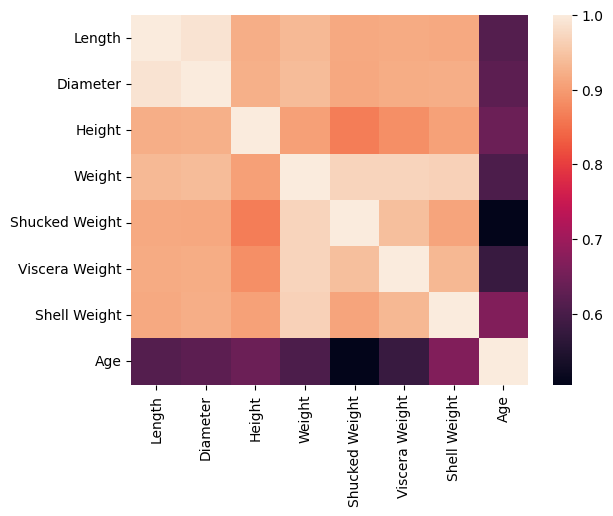

In [165]:
corr = train.corr(numeric_only=True)
sns.heatmap(corr)

In [166]:
corr

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Length,1.000000,0.989404,0.921098,0.935908,0.915015,0.918132,0.916706,0.614887
Diameter,0.989404,1.000000,0.924244,0.938127,0.913902,0.919002,0.922599,0.623272
Height,0.921098,0.924244,1.000000,0.903997,0.866091,0.885515,0.905409,0.641189
Weight,0.935908,0.938127,0.903997,1.000000,0.970913,0.970979,0.965438,0.603804
Shucked Weight,0.915015,0.913902,0.866091,0.970913,1.000000,0.942455,0.909841,0.504952
Viscera Weight,0.918132,0.919002,0.885515,0.970979,0.942455,1.000000,0.933966,0.579972
Shell Weight,0.916706,0.922599,0.905409,0.965438,0.909841,0.933966,1.000000,0.666228
Age,0.614887,0.623272,0.641189,0.603804,0.504952,0.579972,0.666228,1.000000


In [167]:
# Create correlation matrix
corr_matrix =train.corr(numeric_only=True).abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)

['Diameter', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']


In [168]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     49999 non-null  object 
 1   Length  49999 non-null  float64
 2   Height  49999 non-null  float64
 3   Weight  49999 non-null  float64
 4   Age     49999 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.9+ MB


Analyse train

<Axes: xlabel='Sex', ylabel='Age'>

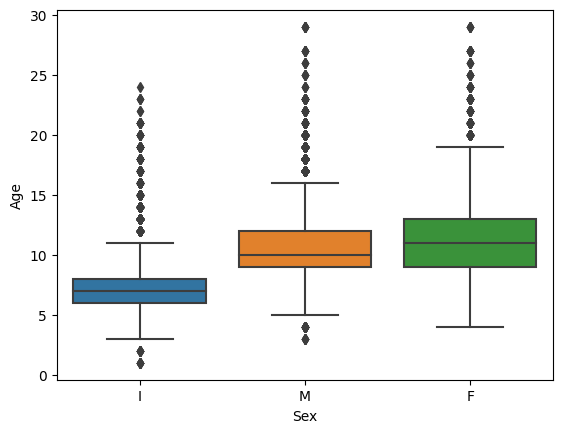

In [169]:
sns.boxplot(data=train, x="Sex", y='Age')

<Axes: xlabel='Length', ylabel='Age'>

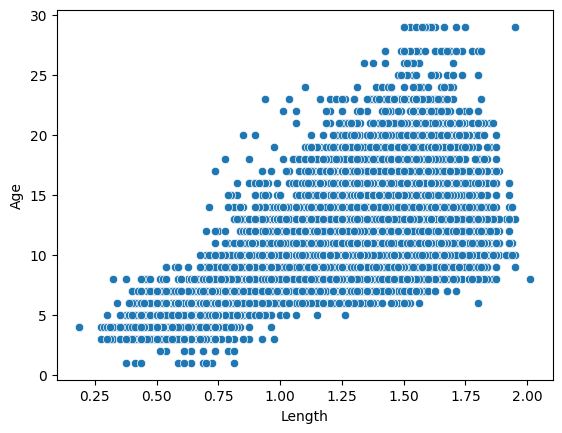

In [170]:
sns.scatterplot(data=train, x="Length", y='Age')

<Axes: xlabel='Height', ylabel='Age'>

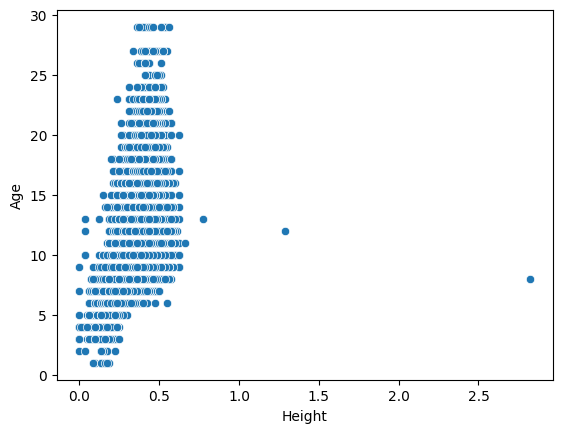

In [171]:
sns.scatterplot(data=train, x="Height", y='Age')

<Axes: xlabel='Weight', ylabel='Age'>

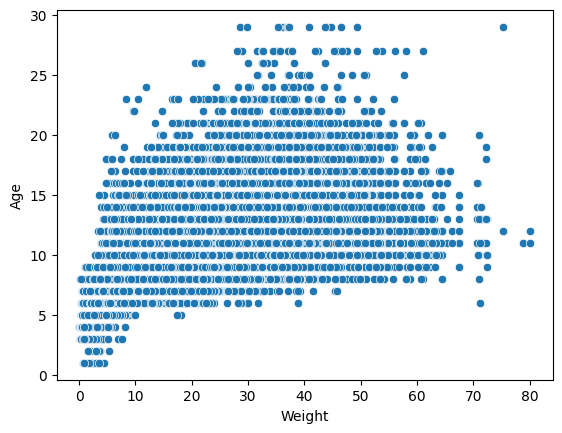

In [172]:
sns.scatterplot(data=train, x="Weight", y='Age')

Ordinal encode columns

In [173]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

for col in train:
    if train[col].dtype == 'object':
        train[col] = enc.fit_transform(train[col].values.reshape(-1,1))
        test[col] = enc.transform(test[col].values.reshape(-1,1))
        
train

,Sex,Length,Height,Weight,Age
0,1.0,1.5250,0.3750,28.973189,9
1,1.0,1.1000,0.2750,10.418441,8
2,2.0,1.3875,0.3750,24.777463,9
3,0.0,1.7000,0.5000,50.660556,11
4,1.0,1.2500,0.3375,23.289114,8
...,...,...,...,...,...
49994,1.0,0.9250,0.2375,5.542327,6
49995,2.0,1.5750,0.3875,28.462898,10
49996,2.0,1.4750,0.3875,29.738626,15
49997,0.0,1.2875,0.3125,21.970862,8


Analyse target

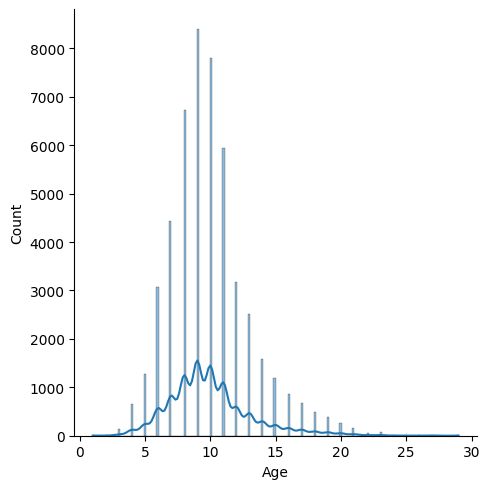

In [174]:
target = train.pop('Age')

sns.displot(target, kde=True)

Define dependent and independent variables

In [175]:
y = target
X = train
X_test = test

Split X and y into training and validation sets

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((44999, 4), (5000, 4), (44999,), (5000,), (29999, 4))

Tensorflow

In [177]:
import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Concatenate, Normalization, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
print(tf.__version__)

2.12.0


Standardise data

In [178]:
normalizer = Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())

[[ 1.0561785   1.3166502   0.34780365 23.358961  ]]


In [179]:
first = np.array(X_train[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 2.    1.48  0.41 29.1 ]]

Normalized: [[1.15 0.55 0.7  0.45]]


Define neural network

In [180]:
model = Sequential(name='crabs')
model.add(normalizer)
model.add(Dense(10, input_dim=X_train.shape[1], activation= "relu", name = 'hidden1'))
model.add(Dense(10, activation= "relu", name = 'hidden2'))
model.add(Dense(1, activation='linear', name='output'))
model.summary() 

Model: "crabs"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 4)                9         
 ion)                                                            
                                                                 
 hidden1 (Dense)             (None, 10)                50        
                                                                 
 hidden2 (Dense)             (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 180
Trainable params: 171
Non-trainable params: 9
_________________________________________________________________


In [181]:
model.compile(loss= "mean_squared_error" , optimizer="RMSprop", metrics=["mse"])

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)
mc = ModelCheckpoint ('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32,callbacks=[early_stopping, mc])
val_loss, val_acc = model.evaluate(X_val, y_val)

Epoch 1/100
1407/1407 [==============================] - 5s 3ms/step - loss: 25.5031 - mse: 25.5031 - val_loss: 5.6655 - val_mse: 5.6655
Epoch 2/100
1407/1407 [==============================] - 5s 3ms/step - loss: 5.8393 - mse: 5.8393 - val_loss: 5.4753 - val_mse: 5.4753
Epoch 3/100
1407/1407 [==============================] - 4s 3ms/step - loss: 5.7692 - mse: 5.7692 - val_loss: 5.4959 - val_mse: 5.4959
Epoch 4/100
1407/1407 [==============================] - 4s 3ms/step - loss: 5.7442 - mse: 5.7442 - val_loss: 5.4517 - val_mse: 5.4517
Epoch 5/100
1407/1407 [==============================] - 4s 2ms/step - loss: 5.7245 - mse: 5.7245 - val_loss: 5.4719 - val_mse: 5.4719
Epoch 6/100
1407/1407 [==============================] - 4s 3ms/step - loss: 5.7152 - mse: 5.7152 - val_loss: 5.4541 - val_mse: 5.4541
Epoch 7/100
1407/1407 [==============================] - 4s 3ms/step - loss: 5.7016 - mse: 5.7016 - val_loss: 5.4208 - val_mse: 5.4208
Epoch 8/100
1407/1407 [==============================

1407/1407 [==============================] - 4s 3ms/step - loss: 5.5669 - mse: 5.5669 - val_loss: 5.5329 - val_mse: 5.5329
Epoch 62/100
1407/1407 [==============================] - 4s 3ms/step - loss: 5.5671 - mse: 5.5671 - val_loss: 5.3494 - val_mse: 5.3494
Epoch 63/100
1407/1407 [==============================] - 4s 3ms/step - loss: 5.5641 - mse: 5.5641 - val_loss: 5.3730 - val_mse: 5.3730
Epoch 64/100
1407/1407 [==============================] - 4s 3ms/step - loss: 5.5593 - mse: 5.5593 - val_loss: 5.3706 - val_mse: 5.3706
Epoch 65/100
1407/1407 [==============================] - 4s 3ms/step - loss: 5.5614 - mse: 5.5614 - val_loss: 5.3693 - val_mse: 5.3693
Epoch 66/100
1407/1407 [==============================] - 4s 3ms/step - loss: 5.5618 - mse: 5.5618 - val_loss: 5.3966 - val_mse: 5.3966
Epoch 67/100
1407/1407 [==============================] - 3s 2ms/step - loss: 5.5571 - mse: 5.5571 - val_loss: 5.4226 - val_mse: 5.4226
Epoch 68/100
1407/1407 [==============================] - 4s 

<function matplotlib.pyplot.show(close=None, block=None)>

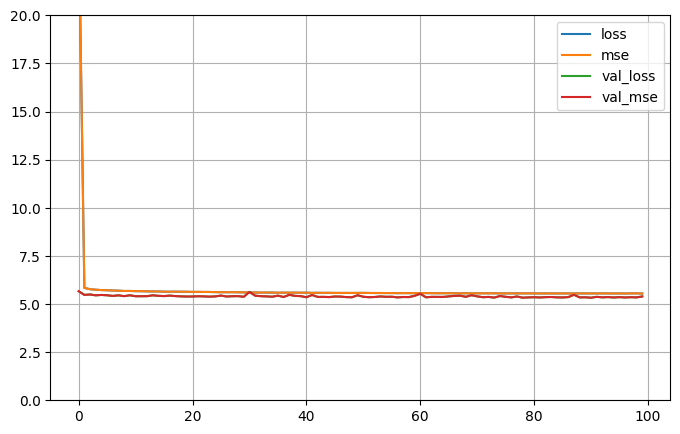

In [182]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,20)
plt.show

In [183]:
y_pred = model.predict(X_val)
y_pred = y_pred.flatten()
y_pred

157/157 [==============================] - 0s 1ms/step


array([10.080578, 12.221031, 12.625415, ...,  8.217085, 12.110329,
       10.671584], dtype=float32)

In [184]:
from sklearn.metrics import mean_squared_error

rms = np.sqrt(mean_squared_error(y_val, y_pred))
rms

2.322608488786576

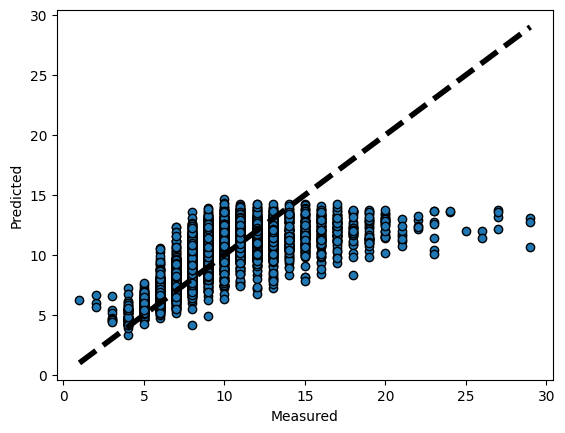

In [185]:
fig, ax = plt.subplots()
ax.scatter(y_val, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [186]:
df_val=pd.DataFrame({'actual_value': y_val.ravel(), 'predicted_value':y_pred.ravel()})
df_val

,actual_value,predicted_value
0,9,10.080578
1,12,12.221031
2,12,12.625415
3,19,12.737334
4,10,7.470902
...,...,...
4995,9,8.274030
4996,11,11.874467
4997,7,8.217085
4998,13,12.110329


Predict on test set

In [187]:
predictions = model.predict(X_test)
predictions = predictions.flatten()
predictions

938/938 [==============================] - 2s 2ms/step


array([ 7.580843,  8.195663,  9.897971, ..., 11.065746, 10.954437,
       10.339864], dtype=float32)

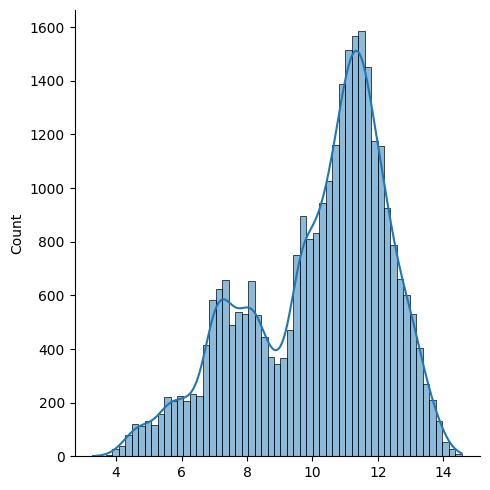

In [188]:
sns.displot(predictions,kde=True)

Prepare submission

In [189]:
submission['Age'] = predictions
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission

,id,Age
0,74051,7.580843
1,74052,8.195663
2,74053,9.897971
3,74054,10.796727
4,74055,7.735340
...,...,...
29994,104045,6.956956
29995,104046,10.719027
29996,104047,11.065746
29997,104048,10.954437
